## Imports

In [ ]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


## Dataset

In [ ]:
df = pd.read_csv("/content/auto-mpg.csv")

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### Droping Column

In [ ]:
column_name = 'car name'
df = df.drop(column_name, axis=1)

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [ ]:
cdf = df[['cylinders','displacement','horsepower','weight','acceleration','model year','origin','mpg']]

In [ ]:
cdf.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,mpg
0,8,307.0,130,3504,12.0,70,1,18.0
1,8,350.0,165,3693,11.5,70,1,15.0
2,8,318.0,150,3436,11.0,70,1,18.0
3,8,304.0,150,3433,12.0,70,1,16.0
4,8,302.0,140,3449,10.5,70,1,17.0


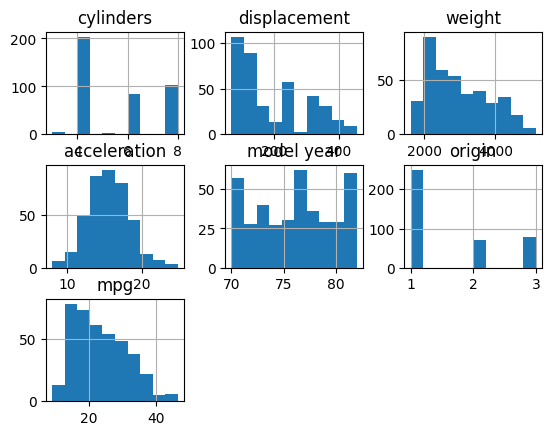

In [ ]:
viz = cdf[['cylinders','displacement','horsepower','weight','acceleration','model year','origin','mpg']]
viz.hist()
plt.show()

In [ ]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
print(train)
print(test)

     cylinders  displacement horsepower  weight  acceleration  model year  \
0            8         307.0        130    3504          12.0          70   
2            8         318.0        150    3436          11.0          70   
4            8         302.0        140    3449          10.5          70   
5            8         429.0        198    4341          10.0          70   
6            8         454.0        220    4354           9.0          70   
..         ...           ...        ...     ...           ...         ...   
391          4         135.0         84    2370          13.0          82   
393          4         140.0         86    2790          15.6          82   
394          4          97.0         52    2130          24.6          82   
395          4         135.0         84    2295          11.6          82   
397          4         119.0         82    2720          19.4          82   

     origin   mpg  
0         1  18.0  
2         1  18.0  
4         1  17

In [ ]:
# # Calculate the correlation matrix
# import seaborn as sns
# correlation_matrix = cdf.corr()

# # Create a heatmap using seaborn
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap')
# plt.show()

In [ ]:
from sklearn import linear_model
regr_m = linear_model.LinearRegression()
train_x = np.asanyarray(train[['cylinders', 'displacement','weight']])
train_y = np.asanyarray(train[['mpg']])
regr_m.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr_m.coef_)
print ('Intercept: ',regr_m.intercept_)

Coefficients:  [[-0.308668   -0.01158457 -0.00583161]]
Intercept:  [44.85379683]


In [ ]:
test_x = np.asanyarray(test[['cylinders', 'displacement','weight']])
test_y = np.asanyarray(test[['mpg']])
test_y_ = regr_m.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 3.28
Residual sum of squares (MSE): 17.39
R2-score: 0.49
